<a href="https://colab.research.google.com/github/rizkynoormuhammad/UJIAN2/blob/main/EDA_Real_Estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df=pd.read_csv('melb_data.csv.zip') #memanggil data frame
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [4]:
df.dropna()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.00,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.00,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.00,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,0.0,245.0,210.00,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,2.0,256.0,107.00,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12205,Whittlesea,30 Sherwin St,3,h,601000.0,S,Ray,29/07/2017,35.5,3757.0,3.0,2.0,1.0,972.0,149.00,1996.0,Whittlesea,-37.51232,145.13282,Northern Victoria,2170.0
12206,Williamstown,75 Cecil St,3,h,1050000.0,VB,Williams,29/07/2017,6.8,3016.0,3.0,1.0,0.0,179.0,115.00,1890.0,Hobsons Bay,-37.86558,144.90474,Western Metropolitan,6380.0
12207,Williamstown,2/29 Dover Rd,1,u,385000.0,SP,Williams,29/07/2017,6.8,3016.0,1.0,1.0,1.0,0.0,35.64,1967.0,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380.0
12209,Windsor,201/152 Peel St,2,u,560000.0,PI,hockingstuart,29/07/2017,4.6,3181.0,2.0,1.0,1.0,0.0,61.60,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0


In [5]:
df['Price'].describe()

count    1.358000e+04
mean     1.075684e+06
std      6.393107e+05
min      8.500000e+04
25%      6.500000e+05
50%      9.030000e+05
75%      1.330000e+06
max      9.000000e+06
Name: Price, dtype: float64

In [6]:
df['Landsize'].describe()

count     13580.000000
mean        558.416127
std        3990.669241
min           0.000000
25%         177.000000
50%         440.000000
75%         651.000000
max      433014.000000
Name: Landsize, dtype: float64

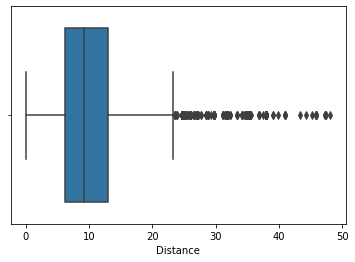

In [7]:
sns.boxplot(x='Distance', data=df)

In [8]:
def AB(x):
    iqr=x.describe().loc['75%']-x.decsribe().loc['25%']
    
    low_lim=x.describe().loc['25%']-1.5*iqr
    up_lim=x.descirbe().loc['75%']+1.5*iqr
    
    outlier=[]
    for i in x:
        if (i> up_lim) or (i<low_lim):
            outlier.append(i)
        return outlier
    len(AB(df['Distance']))


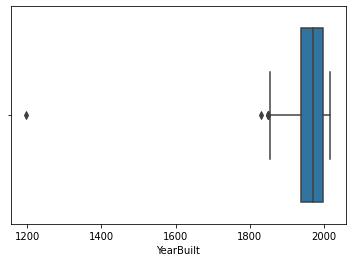

In [9]:
sns.boxplot(x='YearBuilt', data=df)

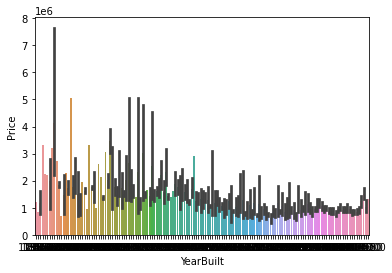

In [11]:
sns.barplot(x='YearBuilt',y='Price', data=df)

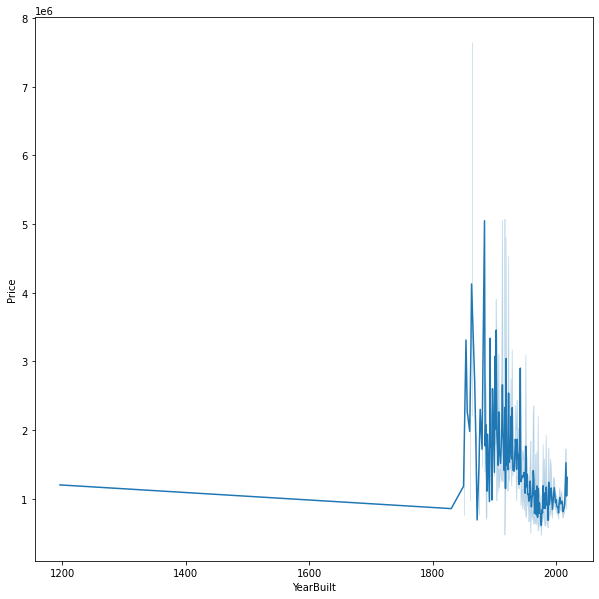

In [15]:
plt.figure(figsize=(10,10))
bx = sns.lineplot(x='YearBuilt', y='Price', data=df)
bx

In [21]:
df.corr(method='spearman')['Price']

Rooms            0.539886
Price            1.000000
Distance        -0.129990
Postcode         0.229903
Bedroom2         0.524029
Bathroom         0.427199
Car              0.288263
Landsize         0.327200
BuildingArea     0.631425
YearBuilt       -0.368080
Lattitude       -0.260322
Longtitude       0.261787
Propertycount   -0.011409
Name: Price, dtype: float64

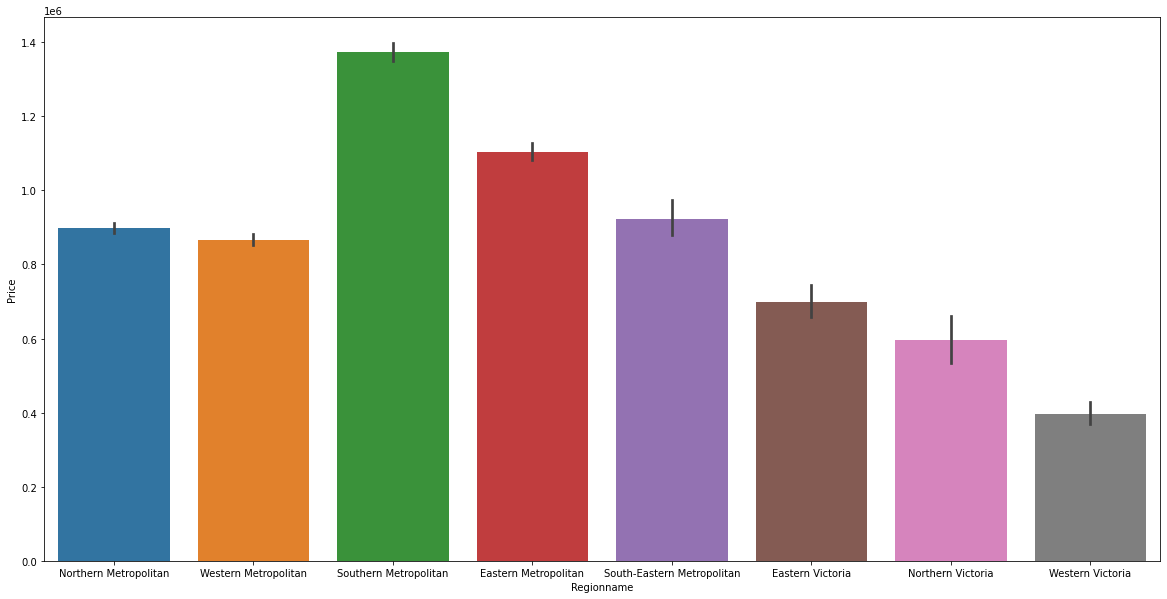

In [23]:
plt.figure(figsize=(20,10))
sns.barplot(x='Regionname',y='Price', data=df)

In [26]:
df.sort_values(by='Price',ascending=False).head()[['CouncilArea','Price']]

,CouncilArea,Price
12094,Monash,9000000.0
7692,Boroondara,8000000.0
9575,Boroondara,7650000.0
3616,Boroondara,6500000.0
12557,NaN,6400000.0


In [27]:
df.sort_values(by='Price',ascending=False).head()[['Type','Price']]

,Type,Price
12094,h,9000000.0
7692,h,8000000.0
9575,h,7650000.0
3616,h,6500000.0
12557,h,6400000.0


AttributeError: ignored